# Tokenization

**SpaCy** is a popular library for natural language processing.<br>In the following exercise, you will use the `spacy.load()` function to tokenize the text.

The function's syntax is `spacy.load(name, **kwargs)`.

*   The **`name`** parameter is the name of the model to be loaded. This could be a package name, a shortcut link, or a path to the model data directory. SpaCy provides several pre-trained models that you can download and use in your code. These models are trained on a variety of data and support a wide range of languages.
*   `**kwargs` represents keyword arguments which are optional.

SpaCy offers several pre-trained models for the English language which are trained on different types and amounts of data:

* **`en_core_web_sm`**: This is the smallest model and is great for getting started with. Assigns word vectors, Part-of-Speech tags, dependency parses and named entities.

* **`en_core_web_md`**: This is the medium version of the English model.

* **`en_core_web_lg`**: This is the large version of the English model.

* **`en_core_web_trf`**: This model is a transformer-based pipeline for English text, using the base model of the transformer architecture. The pipeline includes a tokenizer, a transformer, a part-of-speech tagger, a parser, an attribute ruler, a lemmatizer, and a named entity recognizer.

**1. Load the `en_core_web_sm` model in the `spacy.load()` function and use it on the following sentence.**

*Tips: Store the spacy.load() function in a variable and then use that variable as a regular python function to transform the text.*

In [ ]:
sentence = "This is the 1st part of the 'NLP for chatbots' exercise sheet !"

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(sentence)
doc

This is the 1st part of the 'NLP for chatbots' exercise sheet !

**2. What is the type of the result ?**

*Tips: Use `type()` on the output of question 1*

In [ ]:
type(doc)

spacy.tokens.doc.Doc

The function returns a **Doc object**, which is typically named nlp in SpaCy code.<br> This Doc object contains the processing pipeline and language-specific rules for tokenization.

In our case, the Doc object is essentially a sequence of **Token objects**. The Token class in SpaCy represents a single token — that might be a word, punctuation symbol, whitespace, etc. Each Token object has a number of attributes that provide information about the token.

The **`.text`** attribute of the Token object returns the original text of the token while the .is_alpha, .is_punct and .is_stop respectively returns True if the token is a number or letter, is a punctuation or is a stop word.

**3. Iterate over the Doc object obtained at question 1 and print the `text`, `is_alpha`, `is_punct` and `is_stop`  attributes of each token.**

In [ ]:
print(f"{'Token':15}", end=' ')
print(f"{'Alpha':6}", end=' ')
print(f"{'Punct':6}", end=' ')
print(f"{'Stop':6}", end='\n\n')

for token in doc:
    print(f"{token.text:15}", end=' ')
    print(f"{str(token.is_alpha):6}", end=' ')
    print(f"{str(token.is_punct):6}", end=' ')
    print(f"{str(token.is_stop):6}")

Token           Alpha  Punct  Stop  

This            True   False  True  
is              True   False  True  
the             True   False  True  
1st             False  False  False 
part            True   False  True  
of              True   False  True  
the             True   False  True  
'               False  True   False 
NLP             True   False  False 
for             True   False  True  
chatbots        True   False  False 
'               False  True   False 
exercise        True   False  False 
sheet           True   False  False 
!               False  True   False 


SpaCy tokenization is powerful and can handle various specific cases.<br>
For example, it can be tricky to correctly tokenize the sentence "Dr. Smith graduated from Oxford University in 2023." because of the "Dr." abbreviation, but SpaCy manages it.

**4. Tokenize the aforementioned sentence to see what happens to the "Dr." abbreviation.**

In [ ]:
# The Dr. has been kept as one single token.
doc = nlp("Dr. Smith graduated from Oxford University in 2023.")
list(doc)

[Dr., Smith, graduated, from, Oxford, University, in, 2023, .]

Here is a bunch of other particular cases:

*   "New York City is often just called NYC."
*   "I paid $50 for this T-shirt."
*   "She lives in St. Petersburg, Russia."
*   "We're visiting our cousins in San Francisco."
*   "He said, 'The party starts at 8 p.m.'"
*   "I visited the website www.example.com."
*   "It's 100°F outside."
*   "She got an A+ in her English test."
*   "The email address is example@example.com."

**5. Tokenize the aforementionned cases and find their distinctive characteristic.**

In [ ]:
sentences = ["United States of America is often just called U.S.A.",
             "I paid $50 for this T-shirt.",
             "She lives in St. Petersburg, Russia.",
             "We're visiting our cousins in San Francisco.",
             "He said, 'The party starts at 8 p.m.'",
             "I visited the website www.example.com.",
             "It's 100°F outside.",
             "She got an A+ in her English test.",
             "The email address is example@example.com."]
for sentence in sentences:
    doc = nlp(sentence)
    print(list(doc))

[United, States, of, America, is, often, just, called, U.S.A.]
[I, paid, $, 50, for, this, T, -, shirt, .]
[She, lives, in, St., Petersburg, ,, Russia, .]
[We, 're, visiting, our, cousins, in, San, Francisco, .]
[He, said, ,, ', The, party, starts, at, 8, p.m., ']
[I, visited, the, website, www.example.com, .]
[It, 's, 100, °, F, outside, .]
[She, got, an, A+, in, her, English, test, .]
[The, email, address, is, example@example.com, .]


# Stemming and Lemmatization

SpaCy doesn't include a stemmer but fortunately, **NLTK**, the Natural Language Toolkit, does include a stemming option.

NLTK has two different main stemmers :

* The **Porter Stemmer** is one of the most popular stemming algorithms. It's a rule-based algorithm that strips suffixes based on a series of predefined rules. These rules define whether or not a word can have a certain suffix removed, often by considering the length of the word or what characters it ends with.

* The **Snowball stemmer**, is a slightly improved version of the original Porter stemmer both in terms of logic and speed.

The Porter Stemmer algorithm can be found on the NLTK libray [here](https://www.nltk.org/api/nltk.stem.porter.html) and can be imported from `nltk.stem`.

**1. Use the Porter Stemmer algorithm to stem the following sentences.**

*Tips: the `PorterStemmer() `class from nltk can stem the words individually with its `stem(word, to_lowercase=True)` method.*

In [ ]:
sentences = ["The runner was running in a running event. He outran all the other competitors.",
             "I love studying different studies related to environmental sustainability.",
             "The worker's determination determined the successful outcome of the project.",
             "She's investing in investments that will likely appreciate significantly.",
             "The geese are flying in a loose formation in the sky."]

In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
nlp = spacy.load("en_core_web_sm")

for sentence in sentences:
    doc = nlp(sentence)
    print([ps.stem(word.text) for word in doc])

['the', 'runner', 'wa', 'run', 'in', 'a', 'run', 'event', '.', 'he', 'outran', 'all', 'the', 'other', 'competitor', '.']
['i', 'love', 'studi', 'differ', 'studi', 'relat', 'to', 'environment', 'sustain', '.']
['the', 'worker', "'s", 'determin', 'determin', 'the', 'success', 'outcom', 'of', 'the', 'project', '.']
['she', "'s", 'invest', 'in', 'invest', 'that', 'will', 'like', 'appreci', 'significantli', '.']
['the', 'gees', 'are', 'fli', 'in', 'a', 'loos', 'format', 'in', 'the', 'sky', '.']


**Lemmatization** is generally more sophisticated than stemming because it takes into account the morphological analysis of the words and always returns a valid word that exists in the language.

It can easily be done using the SpaCy library. **`spacy.load()`** creates a Doc object object that contains token objects. Each token in the Doc object includes a variety of attribute, one of which is **`token.lemma_`** that provides the lemmatized form of the word.

**2. Use the `lemma_` attribute to extract the lemmatized form of the words of the aforementionned sentences.<br>Is it better ? Why ?**

In [ ]:
for sentence in sentences:
    doc = nlp(sentence)
    print([word.lemma_ for word in doc])

['the', 'runner', 'be', 'run', 'in', 'a', 'running', 'event', '.', 'he', 'outrun', 'all', 'the', 'other', 'competitor', '.']
['I', 'love', 'study', 'different', 'study', 'relate', 'to', 'environmental', 'sustainability', '.']
['the', 'worker', "'s", 'determination', 'determine', 'the', 'successful', 'outcome', 'of', 'the', 'project', '.']
['she', 'be', 'invest', 'in', 'investment', 'that', 'will', 'likely', 'appreciate', 'significantly', '.']
['the', 'geese', 'be', 'fly', 'in', 'a', 'loose', 'formation', 'in', 'the', 'sky', '.']


# Part of Speech tagging

**Part of Speech tagging** (POS tagging) can easily be done with SpaCy. Similarly to the lemmatization, POS tagging is performed automatically when you create a Doc object. Each token in the Doc object includes two attributes for POS tagging:

*   the **pos_** attribute provides a coarse-grained part-of-speech tag.
*   the **tag_** attribute provides provides a fine-grained part-of-speech tag. It includes more specific information about the word's morphological features, and the specific set of tags used can vary between languages.

At first, most tags are complex and may be hard to understand. To alleviate this issue, SpaCy propose a **`spacy.explain()`** function that explains the various linguistic annotations that it can produce by returning a brief description of what the term means.

**1. Use the `pos` and the `tag` attribute to get POS tagging of these two sentences.**

*Tips: Don't forget to use the `spacy.explain()` function around the POS tag.*

In [ ]:
sentence_1 = "The quick brown fox jumps over the lazy dog."
sentence_2 = "Eating apples and oranges daily improves your health."

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentence_1)
for word in doc:
    print(f"{word.text:10} {word.tag_:5} {word.pos_:10} {spacy.explain(word.tag_)}")

The        DT    DET        determiner
quick      JJ    ADJ        adjective (English), other noun-modifier (Chinese)
brown      JJ    ADJ        adjective (English), other noun-modifier (Chinese)
fox        NN    NOUN       noun, singular or mass
jumps      VBZ   VERB       verb, 3rd person singular present
over       IN    ADP        conjunction, subordinating or preposition
the        DT    DET        determiner
lazy       JJ    ADJ        adjective (English), other noun-modifier (Chinese)
dog        NN    NOUN       noun, singular or mass
.          .     PUNCT      punctuation mark, sentence closer


In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentence_2)
for word in doc:
    print(f"{word.text:10} {word.tag_:5} {word.pos_:10} {spacy.explain(word.tag_)}")

Eating     VBG   VERB       verb, gerund or present participle
apples     NNS   NOUN       noun, plural
and        CC    CCONJ      conjunction, coordinating
oranges    NNS   NOUN       noun, plural
daily      RB    ADV        adverb
improves   VBZ   VERB       verb, 3rd person singular present
your       PRP$  PRON       pronoun, possessive
health     NN    NOUN       noun, singular or mass
.          .     PUNCT      punctuation mark, sentence closer


**displaCy** is SpaCy's built-in library for visualizing dependency parse trees and named entities in a sentence. It is a great tool for exploring and understanding the output of SpaCy's linguistic annotation models.

> *A **dependency parse tree** is a way of showing how words in a sentence relate to each other. It's called a "tree" because it starts with a root word (usually the main verb), and every other word branches off from it or from other words. The "branches" show which words depend on which other words to make sense.*

displaCy has two main function to visualize the sentences:


*   **`displaCy.serve(doc, style)`** that starts a web server to display the visualization, and is not intended for use in production environments.
*   **`displaCy.render(doc, style)`** that generates the tree as an image. This function should be use in Production as well as in Jupyter Notebooks.

**2. Use the displaCy library to render the dependency parse trees of the two aforementionned sentences.**

In [ ]:
from spacy import displacy
doc = nlp(sentence_1)
displacy.render(doc, style="dep", jupyter=True)

In [ ]:
doc = nlp(sentence_2)
displacy.render(doc, style="dep", jupyter=True)

# Named Entity Recognition

SpaCy has a **named entity recognition model** that supports 18 entity types, such as PERSON, NORP (nationalities, religious and political groups), FAC (buildings, airports etc.), ORG (organizations), GPE (countries, cities, states), and so on.

The spaCy Doc object object has an **`.ents`** property that can be used to extract named entities. You can then access the entity text, starting position, ending position and name with the **`.text`**, **`.start_char`**, **`.end_char`** and the **`.label`** attributes respectively.

**1. Find the different named entities of each of the following sentences.**

In [ ]:
sentence_1 = "Microsoft, headquartered in Redmond, Washington, acquired LinkedIn for $26.2 billion in 2016, which was their biggest deal to date."
sentence_2 = "Emma Watson, a British actress best known for her role in the Harry Potter series, graduated from Brown University in Providence, Rhode Island in 2014."

In [ ]:
doc1 = nlp(sentence_1)
for ent in doc1.ents:
     print(f"{ent.text = :20} {ent.label_ = }")

ent.text = Microsoft            ent.label_ = 'ORG'
ent.text = Redmond              ent.label_ = 'GPE'
ent.text = Washington           ent.label_ = 'GPE'
ent.text = LinkedIn             ent.label_ = 'GPE'
ent.text = $26.2 billion        ent.label_ = 'MONEY'
ent.text = 2016                 ent.label_ = 'DATE'


In [ ]:
doc2 = nlp(sentence_2)
for ent in doc2.ents:
     print(f"{ent.text = :20} {ent.label_ = }")

ent.text = Emma Watson          ent.label_ = 'PERSON'
ent.text = British              ent.label_ = 'NORP'
ent.text = Harry Potter         ent.label_ = 'PERSON'
ent.text = Brown University     ent.label_ = 'ORG'
ent.text = Providence           ent.label_ = 'GPE'
ent.text = Rhode Island         ent.label_ = 'GPE'
ent.text = 2014                 ent.label_ = 'DATE'


**2. Use displaCy to display the two sentences with their respective named entities.**

In [ ]:
displacy.render(doc1, style="ent", jupyter=True)

In [ ]:
displacy.render(doc2, style="ent", jupyter=True)

# Word Embedding

In [ ]:
# the en_core_web_sm model doesn't have any vector
# thus, word embedding can only be done with the en_core_web_md or better
!python -m spacy download en_core_web_md

In SpaCy, both Doc and Token objects have a **`.vector`** attribute.<br> This is a n-dimensional representation of the word or document using real numbers: the **word embedding**.

In SpaCy, the sentence embedding is an average of its word embeddings.<br>Averaging word embeddings to get a sentence embedding is a simple and fast method, but it can lose important information.<br> Better methods like RNNs and Transformers have been developed to take into account the order of words and the context they are used in.

**1. Display the word embeddings of the following word and sentence using the `.vector` attribute.**

In [ ]:
word = "red"
sentence = "Jasmine felt joy noticing the change in her garden. Once pale, the roses were now a vibrant fuchsia, their color like a sunset. Her marigolds had proliferated, their numbers mirroring stars in the night sky. Amidst this spectacle, her delight soared like the blooming flowers."

In [ ]:
# word vector
nlp = spacy.load("en_core_web_md")
doc = nlp(word)
doc.vector

array([ -6.9878  ,   1.1615  ,  -8.0692  ,   7.8001  ,   1.5212  ,
        -7.2222  ,  -2.0646  ,   1.894   ,   2.3625  ,   2.6902  ,
         9.4979  ,  -3.4991  ,  -0.38432 ,  -6.0193  ,   1.2838  ,
        -2.6806  ,  -2.2116  ,   3.9222  ,   7.5336  ,  -1.0964  ,
        -5.1213  ,  -0.34198 ,  -1.5403  ,  -9.3968  ,   1.0018  ,
        -1.0686  ,  -3.9285  , -10.047   ,   7.1468  ,  -2.169   ,
        -5.3271  ,   2.5496  ,  -0.11356 ,  -4.0581  ,   5.9786  ,
        -4.4822  ,   0.22744 ,   6.5518  ,   3.3793  ,  -6.5683  ,
         8.0658  ,  -3.243   ,   4.5571  ,   0.32214 ,  -1.7703  ,
         8.0863  ,  -4.6628  ,  -2.0046  , -12.432   ,   2.341   ,
         0.33277 ,   1.3754  ,  -7.0821  ,   4.6489  ,  -1.2588  ,
         3.6096  ,   4.3955  ,   0.4455  ,   2.2074  ,   4.2716  ,
         2.0343  ,  -2.2034  ,   3.0309  ,  -0.15809 ,  -6.0334  ,
        -3.6964  ,   0.10791 ,  -9.4457  ,   0.39546 ,   4.1398  ,
         5.7631  ,   4.1801  ,  -0.11611 ,   8.6585  ,   5.856

In [ ]:
# sentence vector
doc = nlp(sentence)
doc.vector

array([-1.63753080e+00,  2.35903248e-01, -2.77067852e+00, -3.43604125e-02,
        4.15163422e+00, -1.21671236e+00, -8.88198614e-03,  4.63980150e+00,
        6.97373092e-01,  8.02708387e-01,  5.83615303e+00,  7.35451043e-01,
       -3.33561182e+00,  7.94211090e-01,  2.37636733e+00,  1.44968116e+00,
       -5.95934868e-01, -7.48656571e-01, -2.14183345e-01, -2.09285021e+00,
        1.86846328e+00,  4.23778772e-01, -1.07583702e+00, -1.80203676e+00,
       -3.87148917e-01, -1.19876778e+00, -3.59721684e+00, -1.75524282e+00,
        4.18990016e-01,  1.23090303e+00,  9.07052250e-04, -1.39818013e+00,
       -5.38067520e-01, -2.70251417e+00, -2.85592890e+00, -1.94530115e-01,
       -6.03705108e-01,  1.77066731e+00,  1.18583691e+00,  1.98074505e-01,
        9.54518974e-01,  8.51093650e-01,  1.06224164e-01, -3.07138979e-01,
       -7.74031222e-01,  2.74235106e+00, -1.02498376e+00, -1.39977682e+00,
       -3.04882657e-02,  1.40080392e+00, -1.32909524e+00,  1.92562819e+00,
       -6.05269670e-01, -

**2. Reduce the dimensionality of each word of the aforementionned sentence to a 2D representation using t-SNE from sklearn.<br> Display a 2D graph with the words.<br>Can you find related words ?**

*Tips: The result will be cleaner if you remove the stopwords and the punctuation.*

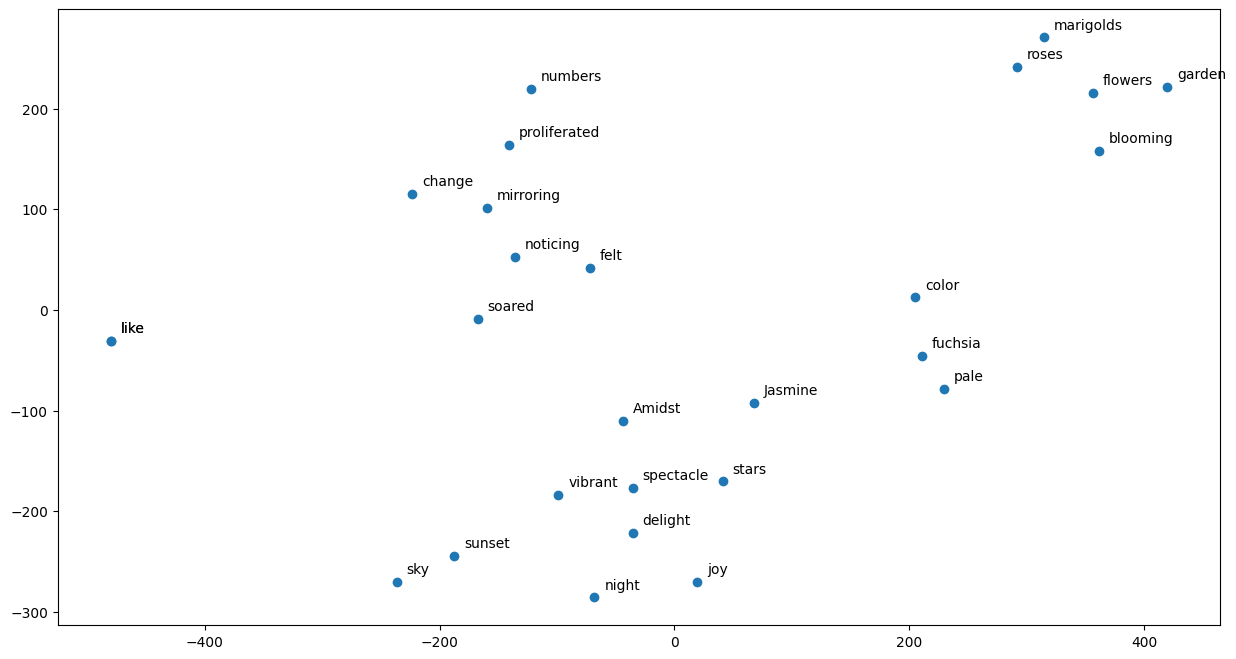

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

doc = nlp(sentence)
emb = []
words = []

# Getting the individual word embedding
for i,word in enumerate(doc):
    if not(word.is_stop) and not(word.is_punct):
        emb.append(word.vector)
        words.append(word.text)

# Reducing the dimensionality
tsne = TSNE(perplexity=2, random_state=42)
emb2d = tsne.fit_transform(np.array(emb))

# Displaying the words
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(emb2d[:,0], emb2d[:,1])

for i, word in enumerate(words):
    ax.annotate(word, emb2d[i,:]+0.02*np.max(emb2d))

It's possible to measure **word** and **sentence similarity** using the SpaCy library.<br> The similarity is based on the word vectors included in the SpaCy model.<br> Each Token object from the spaCy Doc objects contains a word vector representation that can be used to compute similarity.

Similiarity can be computed using the **`.similarity()`** method.<br> It can be called on Token objects for word similarity, or Doc objects for sentence similarity:


```
word_sim = token_a.similarity(token_b)
sentence_sim = doc_a.similarity(doc_b)
```


**3. Compare each token of the following sentence using the `.similarity()` method.**

In [ ]:
sentence = "She's very excited about starting her new job next week."

In [ ]:
import pandas as pd

doc = nlp(sentence)

similarity = np.zeros((len(doc),len(doc)))

for i, word_a in enumerate(doc):
    similarity[i,:] = np.array([word_a.similarity(word_b) for word_b in doc])

q = np.quantile(similarity, q=0.95)

# Removing the word autocorrelation (i.e. "she" with "she", "very" with "very" ...)
np.fill_diagonal(similarity, np.NaN)

# Displaying the results is a nice format
sim = pd.DataFrame(similarity,
                   index = [word.text for word in doc],
                   columns = [word.text for word in doc])

sim.style.apply(lambda x: ["background: lightblue" if v > q else "" for v in x],
                axis = 0)

,She,'s,very,excited,about,starting,her,new,job,next,week,.
She,nan,0.032019,0.206274,0.075724,0.143135,-0.064667,0.571110,0.000406,0.200048,0.032130,0.115551,0.117281
's,0.032019,nan,0.155973,0.132308,0.188594,0.126425,0.293018,0.094454,0.100183,0.112859,0.029439,0.259304
very,0.206274,0.155973,nan,0.248575,0.347958,0.354568,0.139076,0.145049,0.249942,0.115524,0.094125,0.278686
excited,0.075724,0.132308,0.248575,nan,0.329759,0.338691,0.109986,0.375137,0.190199,0.318113,0.236667,0.141614
about,0.143135,0.188594,0.347958,0.329759,nan,0.354985,0.183071,0.235094,0.213673,0.211931,0.206261,0.320803
starting,-0.064667,0.126425,0.354568,0.338691,0.354985,nan,0.092750,0.413129,0.191132,0.343713,0.294430,0.394351
her,0.571110,0.293018,0.139076,0.109986,0.183071,0.092750,nan,0.124836,0.138156,0.101789,0.090813,0.210664
new,0.000406,0.094454,0.145049,0.375137,0.235094,0.413129,0.124836,nan,0.135078,0.388973,0.146542,0.240406
job,0.200048,0.100183,0.249942,0.190199,0.213673,0.191132,0.138156,0.135078,nan,0.131315,0.203073,0.150671
next,0.032130,0.112859,0.115524,0.318113,0.211931,0.343713,0.101789,0.388973,0.131315,nan,0.211013,0.191143


**4. Compute the similarity between the four following sentences.<br> Which one seems to be the closest to the first one ?**

*Tips: Removing the stopwords will improve the sentence comparison.*

In [ ]:
sentences = ["She's very excited about starting her new job next week.",
             "She's really looking forward to beginning her new role in the coming week.",
             "Eating apples and oranges daily improves your health.",
             "The runner was running in a running event. He outran all the other competitors."]

In [ ]:
similarity = np.zeros((4,4))

# Removing stop words
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(nltk.corpus.stopwords.words('english'))

for i in range(len(sentences)):
    tokens = nltk.tokenize.word_tokenize(sentences[i])
    sentences[i] = ' '.join([w for w in tokens if not w.lower() in stop_words])

# Computing similarity
for i,sentence in enumerate(sentences):
    doc = nlp(sentence)
    similarity[i,:] = np.array([doc.similarity(nlp(sentence_b)) for sentence_b in sentences])

# Removing the sentence autocorrelation
np.fill_diagonal(similarity, np.NaN)

# Displaying the results is a nice format
sim = pd.DataFrame(similarity,
                   index = [f"Sentence {i+1}" for i in range(4)],
                   columns = [f"Sentence {i+1}" for i in range(4)])

sim

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Sentence 1,Sentence 2,Sentence 3,Sentence 4
Sentence 1,NaN,0.904747,0.500937,0.674702
Sentence 2,0.904747,NaN,0.590377,0.730770
Sentence 3,0.500937,0.590377,NaN,0.638241
Sentence 4,0.674702,0.730770,0.638241,NaN


# Bag of words

In [ ]:
from sklearn.datasets import fetch_openml
import ast

df = fetch_openml("DBLP-QuAD", parser='auto')['data']['question'].apply(lambda x:ast.literal_eval(x)['string'])
df

0       What are the papers written by the person Wazi...
1                 What is the Wikidata ID of Yvo Desmedt?
2       What is the primary affiliation of Leandro Kru...
3                      What is the webpage of Ravi Kumar?
4          Which publications did Lambe, Larry A. author?
                              ...                        
9995    Who has published the most papers among the au...
9996    Mention the author who has published the most ...
9997    Who published their first paper among the auth...
9998    Between 'Graphics and Security: Exploring Visu...
9999    Name the author who published their first pape...
Name: question, Length: 10000, dtype: object

**Bag of words** can be implement using **Scikit-Learn**'s **`CountVectorizer`**, which converts a collection of text documents to a matrix of token counts.

**`CountVectorizer`** follows the regular Sklearn syntax:
```
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(documents)
```
It can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). <br>It has several parameters that allow you to customize its behavior:


*   **`max_features`**: This parameter allows you to set a maximum number of words for the vocabulary, keeping only the top max_features most frequent words. This can be useful if you have very large documents and want to limit the complexity of the model.

*   **`min_df`**: This is the minimum document frequency for a word to be included in the vocabulary. This can be an absolute count (e.g., min_df=5 means a word must appear in at least 5 documents to be included) or a proportion of the total documents (e.g., min_df=0.01 means the word must appear in at least 1% of the documents).

*   **`max_df`**: This is the maximum document frequency for a word to be included in the vocabulary. Like min_df, this can be an absolute count or a proportion of total documents. Words that appear too frequently (like common stopwords) can be removed by setting this parameter to a lower value.

*   **`stop_words`**: This can be a list of words to be removed from the documents or the string 'english' to use a built-in list of English stop words.

*   **`ngram_range`**: This is a tuple (min_n, max_n) that defines the minimum and maximum length of sequences of words to consider. For example, ngram_range=(1, 2) would consider both individual words and pairs of consecutive words.

*   **`binary`**: If set to True, this parameter will make the vectorizer use binary occurrence markers instead of counts. This means that the presence or absence of a word will be marked by 1 and 0, regardless of how many times it appears.

The output is a sparse matrix where each row represents a specific text in documents and each column represents a word in the vocabulary. <br>To transform the sparse matrix into an array and see the vocabulary you can use:

```
# The name of the words found in the documents
vectorizer.get_feature_names_out()

# Transform the sparse matrix into an array
bag_of_words.toarray()
```


**1. Count the word frequency for each text of the dataset using `binary=true` and `stop_words='english'` in `CountVectorizer`.<br>Transform the sparse matrix into an array.**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True, stop_words='english')
bag_of_words = vectorizer.fit_transform(df)
bag_of_words = bag_of_words.toarray()
bag_of_words

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**2. Turn the result in a Pandas Dataframe and add the word names as columns using `.get_feature_names_out()`**

In [ ]:
bag_of_words = pd.DataFrame(bag_of_words,
                            columns=vectorizer.get_feature_names_out())
bag_of_words

,01903,0262101141,037w,06,064mm2,07431,0750663510,09,10,100,...,zum,zunino,zuo,zur,zurich,zusammenh,zvs,zwieback,zwischen,zwolinski
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**3. Find the top-5 most frequent words in the documents.**

*Tips: You can compare the mean of frequency in the documents for each word using the `.mean()` method and sort the values using the `sort_values()` method.*

In [ ]:
bag_of_words.mean().sort_values()[-5:]

did          0.2231
paper        0.3407
papers       0.3452
authors      0.3777
published    0.5016
dtype: float64

**4. Find the bi-grams to the bag of words using the `ngram_range` parameter.<br> How many elements does the bag of words have ?**

*Tips: A bi-gram is a sequence of two adjacent words  that appear together in a sentence.*

In [ ]:
vectorizer = CountVectorizer(binary=True,
                             stop_words='english',
                             ngram_range=(2,2))
bag_of_words = vectorizer.fit_transform(df)
bag_of_words = bag_of_words.toarray()
bag_of_words = pd.DataFrame(bag_of_words,
                            columns=vectorizer.get_feature_names_out())
bag_of_words

KeyboardInterrupt: ignored

**5. Find the top-5 most frequent bi-grams in the documents.**

In [ ]:
bag_of_words.mean().sort_values()[-5:]

# TF-IDF

**TF-IDF** can be implement using **Scikit-Learn**'s **`TfidfVectorizer`**, which converts a collection of text documents to a matrix of TF-IDF features that reflects how important a word is to a document in a collection of documents.

**`TfidfVectorizer`** follows the regular Sklearn syntax:

```
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(documents)
```

It can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). <br>It has several parameters that allow you to customize its behavior:


*   **`max_features`**: This parameter allows you to set a maximum number of words for the vocabulary, keeping only the top max_features most frequent words. This can be useful if you have very large documents and want to limit the complexity of the model.

*   **`min_df`**: This is the minimum document frequency for a word to be included in the vocabulary. This can be an absolute count (e.g., min_df=5 means a word must appear in at least 5 documents to be included) or a proportion of the total documents (e.g., min_df=0.01 means the word must appear in at least 1% of the documents).

*   **`max_df`**: This is the maximum document frequency for a word to be included in the vocabulary. Like min_df, this can be an absolute count or a proportion of total documents. Words that appear too frequently (like common stopwords) can be removed by setting this parameter to a lower value.

*   **`stop_words`**: This can be a list of words to be removed from the documents or the string 'english' to use a built-in list of English stop words.

*   **`ngram_range`**: This is a tuple (min_n, max_n) that defines the minimum and maximum length of sequences of words to consider. For example, ngram_range=(1, 2) would consider both individual words and pairs of consecutive words.

*   **`smooth_idf`**: Smooth idf weights by adding one to document frequencies, as if an extra document was seen containing every term in the collection exactly once. Prevents zero divisions.

The output is a sparse matrix where each row represents a specific text in documents and each column represents a word in the vocabulary. <br>To transform the sparse matrix into an array and see the vocabulary you can use:

```
# The name of the words found in the documents
vectorizer.get_feature_names_out()

# Transform the sparse matrix into an array
tf_idf.toarray()
```

**1. Compute the tf-idf of each word for each text of the dataset using `TfidfVectorizer`.<br>Transform the sparse matrix into an array.**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(df)
tf_idf = tf_idf.toarray()
tf_idf = pd.DataFrame(tf_idf,
                      columns=vectorizer.get_feature_names_out())
tf_idf

,01903,0262101141,037w,06,064mm2,07431,0750663510,09,10,100,...,zum,zunino,zuo,zur,zurich,zusammenh,zvs,zwieback,zwischen,zwolinski
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**2. Find the word importance of some questions of the dataset.**

In [ ]:
df[1]

'What is the Wikidata ID of Yvo Desmedt?'

In [ ]:
# Yvo desmedt seems to be the most important
tf_idf.iloc[1,:][tf_idf.iloc[1,:] !=0]

desmedt     0.554864
id          0.384756
is          0.238586
of          0.094740
the         0.068174
what        0.170525
wikidata    0.369581
yvo         0.554864
Name: 1, dtype: float64